## 统计不同样本的个数

- 将「测试集」和「训练集」中每个 label 的样本数相加
- 将最终的结果绘制为柱状图

In [1]:
import numpy as np

In [29]:
# 定义公共变量
label_file_train = '../../data/npy_data/784_session_all/train-labels.npy' # 训练集的 label
label_file_test = '../../data/npy_data/784_session_all/test-labels.npy' # 测试集的 label
label2index = {'Chat': 0, 'Email': 1, 'FT': 2, 'P2P': 3, 'Stream': 4, 'VoIP': 5, 'VPN_Chat': 6, 'VPN_Email': 7, 'VPN_FT': 8, 'VPN_P2P': 9, 'VPN_Stream': 10, 'VPN_VoIP': 11}
index2label = {0: 'Chat', 1: 'Email', 2: 'FT', 3: 'P2P', 4: 'Stream', 5: 'VoIP', 6: 'VPN_Chat', 7: 'VPN_Email', 8: 'VPN_FT', 9: 'VPN_P2P', 10: 'VPN_Stream', 11: 'VPN_VoIP'}

In [30]:
label_train_data = np.load(label_file_train) # 获得 train 的 label 文件
label_test_data = np.load(label_file_test) # 获得 test 的 label 文件

In [31]:
print('训练集 label 个数 {}; 测试集 label 个数 {};'.format(label_train_data.shape, label_test_data.shape))

训练集 label 个数 (49986,); 测试集 label 个数 (5618,);


### 得到各个 label 样本个数

最终可以得到如下所示的结果:

```python
{'Chat': 1237, 'Email': 631, 'FT': 12263, 'P2P': 389, 'Streaming': 1651, 'VoIP': 37105, 'VPN_Chat': 256, 'VPN_Email': 143, 'VPN_FT': 438, 'VPN_P2P': 256, 'VPN_Streaming': 536, 'VPN_VoIP': 699}
```

In [32]:
# 统计 12 类样本的各自的个数
unique, counts = np.unique(label_test_data, return_counts=True)
test_label2num = dict(zip(unique, counts))
print(test_label2num)

unique, counts = np.unique(label_train_data, return_counts=True)
train_label2num = dict(zip(unique, counts))
print(train_label2num)

{0: 137, 1: 64, 2: 1236, 3: 39, 4: 178, 5: 3720, 6: 29, 7: 15, 8: 46, 9: 26, 10: 57, 11: 71}
{0: 1100, 1: 567, 2: 11027, 3: 350, 4: 1473, 5: 33385, 6: 227, 7: 128, 8: 392, 9: 230, 10: 479, 11: 628}


In [33]:
label2num = {} # 每个 label 的样本个数

for label in train_label2num:
    label_name = index2label[label]
    label2num[label_name] = train_label2num[label] + test_label2num[label]

print(label2num)

{'Chat': 1237, 'Email': 631, 'FT': 12263, 'P2P': 389, 'Stream': 1651, 'VoIP': 37105, 'VPN_Chat': 256, 'VPN_Email': 143, 'VPN_FT': 438, 'VPN_P2P': 256, 'VPN_Stream': 536, 'VPN_VoIP': 699}


### 进行可视化展示

In [13]:
import matplotlib.pyplot as plt

In [16]:
plt.style.use(['science', 'no-latex'])

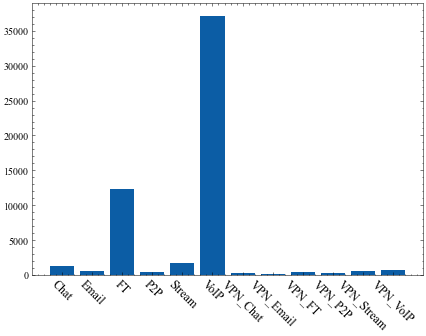

In [34]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)

labels = label2num.keys()
data = label2num.values()

plt.bar(labels, data) # 绘图
ax.set_xticklabels(labels, rotation=-45, fontsize=12) # 设置字体大小和倾斜

plt.show()